***欠拟合与过拟合***

In [3]:
X_train = [[6],[8],[10],[14],[18]]
y_train = [[7],[9],[13],[17.5],[18]]

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

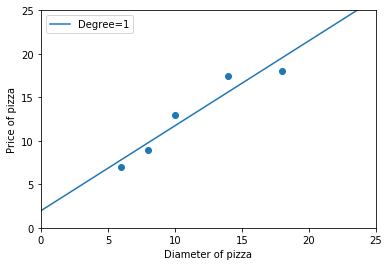

R-squared value is: 0.9100015964240102


In [7]:
import numpy as np
xx = np.linspace(0,26,100)
xx = xx.reshape(-1,1)
yy = lr.predict(xx)

import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)

plt1,=plt.plot(xx,yy,label='Degree=1')
plt.axis([0,25,0,25])
plt.xlabel('Diameter of pizza')
plt.ylabel('Price of pizza')
plt.legend(handles = [plt1])
plt.show()

print 'R-squared value is:',lr.score(X_train,y_train)

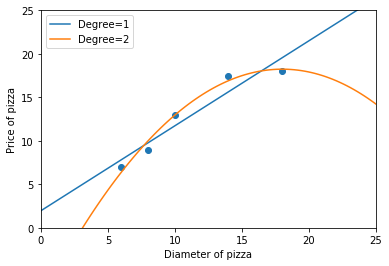

R-squared value is: 0.9816421639597427


In [15]:
#使用二次多项式特征进行拟合
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)

lr_poly2 = LinearRegression()
lr_poly2.fit(X_train_poly2,y_train)

xx_poly2 = poly2.transform(xx)
yy_poly2 = lr_poly2.predict(xx_poly2)

#根据上述数据进行绘图
plt.scatter(X_train,y_train)

plt1,=plt.plot(xx,yy,label='Degree=1')
plt2,=plt.plot(xx,yy_poly2,label='Degree=2')
plt.axis([0,25,0,25])
plt.xlabel('Diameter of pizza')
plt.ylabel('Price of pizza')
plt.legend(handles = [plt1,plt2])
plt.show()

print 'R-squared value is:',lr_poly2.score(X_train_poly2,y_train)

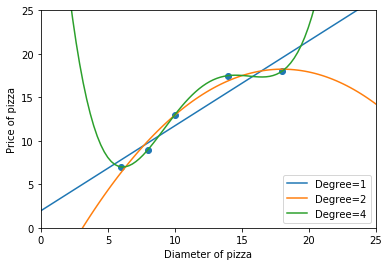

 R-squared value is: 1.0


In [14]:
#使用四次多项式特征进行拟合
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)
lr_poly4 = LinearRegression()
lr_poly4.fit(X_train_poly4,y_train)

xx_poly4 = poly4.transform(xx)
yy_poly4 = lr_poly4.predict(xx_poly4)

#根据上述数据进行绘图
plt.scatter(X_train,y_train)

plt1,=plt.plot(xx,yy,label='Degree=1')
plt2,=plt.plot(xx,yy_poly2,label='Degree=2')
plt3,=plt.plot(xx,yy_poly4,label='Degree=4')
plt.axis([0,25,0,25])
plt.xlabel('Diameter of pizza')
plt.ylabel('Price of pizza')
plt.legend(handles = [plt1,plt2,plt3])
plt.show()

print 'R-squared value is:',lr_poly4.score(X_train_poly4,y_train)

In [17]:
#测试训练好的三个模型在测试集上的表现
X_test = [[6],[8],[11],[16]]
y_test = [[8],[12],[15],[18]]

print '一次多项式得分:',lr.score(X_test,y_test)

X_test_poly2 = poly2.transform(X_test)
print '二次多项式得分:',lr_poly2.score(X_test_poly2,y_test)

X_test_poly4 = poly4.transform(X_test)
print '四次多项式得分:',lr_poly4.score(X_test_poly4,y_test)

一次多项式得分: 0.809726797707665
二次多项式得分: 0.8675443656345073
四次多项式得分: 0.8095880795766807


In [20]:
#L1范数正则化
from sklearn.linear_model import Lasso

lasso_poly4 = Lasso()
lasso_poly4.fit(X_train_poly4,y_train)
print lasso_poly4.score(X_test_poly4,y_test)
print lasso_poly4.coef_

#L2范数正则化
from sklearn.linear_model import Ridge

ridge_poly4 = Ridge()
ridge_poly4.fit(X_train_poly4,y_train)
print ridge_poly4.score(X_test_poly4,y_test)
print ridge_poly4.coef_

0.8388926873604382
[ 0.00000000e+00  0.00000000e+00  1.17900534e-01  5.42646770e-05
 -2.23027128e-04]
0.8374201759366577
[[ 0.         -0.00492536  0.12439632 -0.00046471 -0.00021205]]
